In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
 !pip uninstall -y numpy tensorflow

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0


In [ ]:
!pip install scikit-learn==1.2.2 imbalanced-learn==0.10.1 tensorflow==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 64.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 48.5 MB/s eta 0:00:00
   ━━

In [ ]:

!pip install numpy==1.23.5

In [ ]:
# Cell 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud
from xgboost import XGBClassifier
import tensorflow as tf
import pickle
import os
from warnings import simplefilter
simplefilter("ignore")

# Download required NLTK data
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Cell 2: Helper Functions
def get_test_scores(model_name, preds, y_test_data):
    metrics = {
        'model': model_name,
        'accuracy': accuracy_score(y_test_data, preds),
        'precision': precision_score(y_test_data, preds, average='macro'),
        'recall': recall_score(y_test_data, preds, average='macro'),
        'f1': f1_score(y_test_data, preds, average='macro')
    }
    return pd.DataFrame([metrics])

def preprocess_text(data):
    data_out = data.str.replace('\n', ' ')
    punct = "\n\r" + string.punctuation
    data_out = data_out.str.translate(str.maketrans('', '', punct))
    data_out = data_out.apply(lambda x: x.lower())
    return data_out



In [ ]:
# Cell 3: Load and Prepare Data
df = pd.read_csv('/content/bbc_text_cls.csv')
inputs = df['text']
labels = df['labels']
X_train, X_test, y_train, y_test = train_test_split(inputs, labels, random_state=42)

print("Dataset shape:", df.shape)
print("\nSample data:")
print(df.head(2))



Dataset shape: (2225, 2)

Sample data:
                                                text    labels
0  Ad sales boost Time Warner profit\n\nQuarterly...  business
1  Dollar gains on Greenspan speech\n\nThe dollar...  business


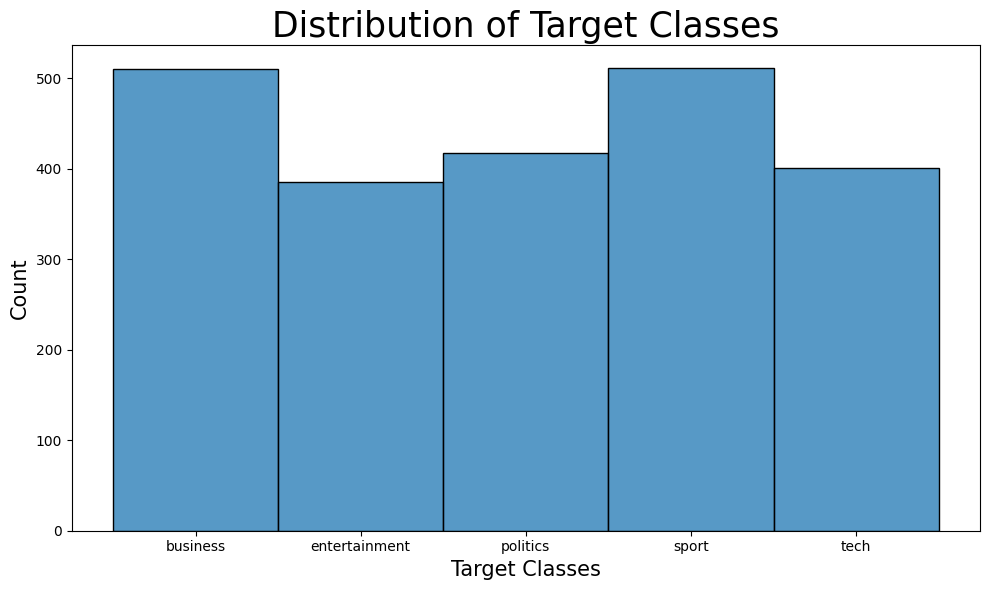

In [ ]:
# Cell 4: Data Visualization - Class Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=labels)
plt.title('Distribution of Target Classes', fontsize=25)
plt.xlabel('Target Classes', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.tight_layout()
plt.show()



Mean words in sport articles: 329.3
Mean words in business articles: 328.9
Mean words in politics articles: 454.0
Mean words in entertainment articles: 330.6
Mean words in tech articles: 502.7


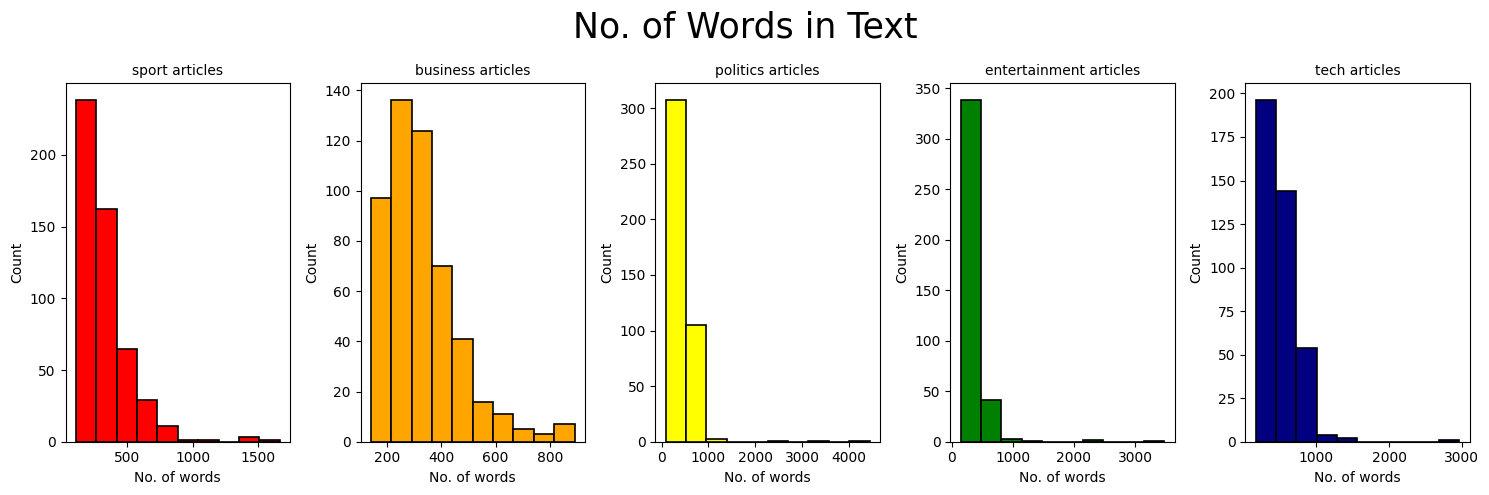

In [ ]:
# Cell 5: Data Visualization - Word Distribution
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(ncols=5, figsize=(15, 5))
categories = ['sport', 'business', 'politics', 'entertainment', 'tech']
colors = ['red', 'orange', 'yellow', 'green', 'navy']

for cat, color, ax in zip(categories, colors, [ax1, ax2, ax3, ax4, ax5]):
    word_len = df[df['labels']==cat]['text'].str.split().map(lambda x: len(x))
    ax.hist(word_len, color=color, edgecolor='black', linewidth=1.2)
    ax.set_title(f'{cat} articles', size=10)
    ax.set_xlabel('No. of words', size=10)
    ax.set_ylabel('Count', size=10)
    print(f'Mean words in {cat} articles: {word_len.mean():.1f}')

plt.suptitle("No. of Words in Text", size=25)
plt.tight_layout()
plt.show()



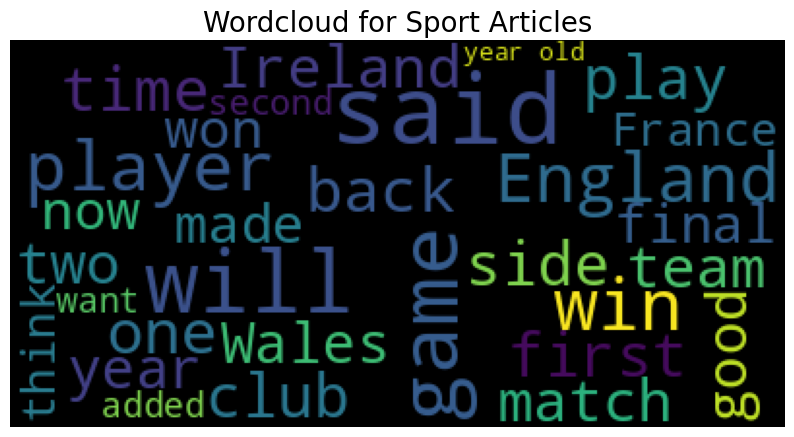

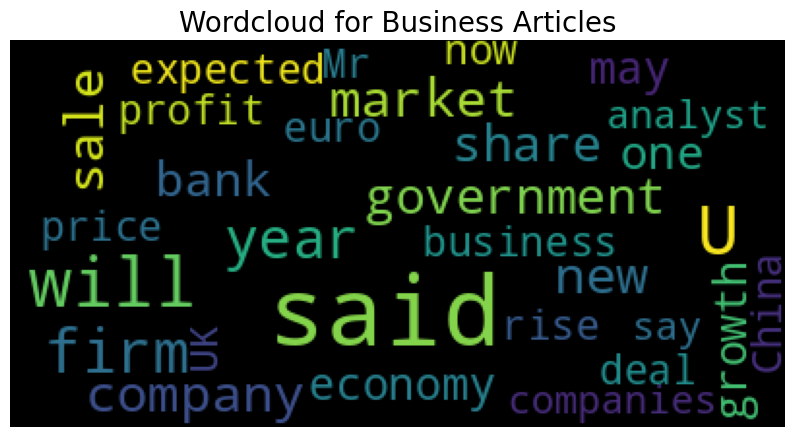

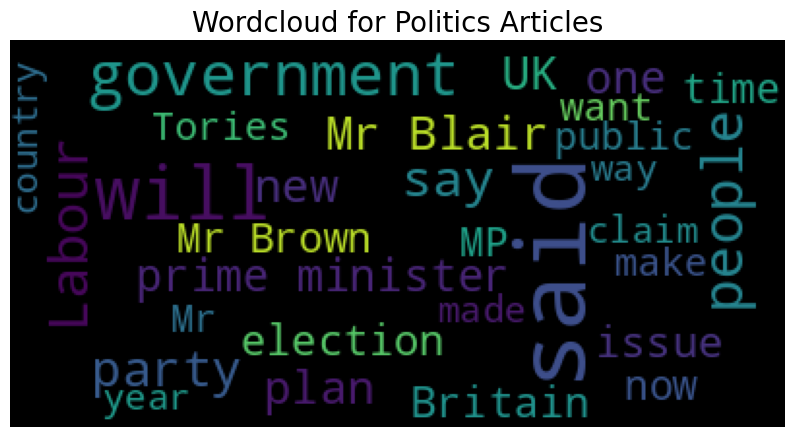

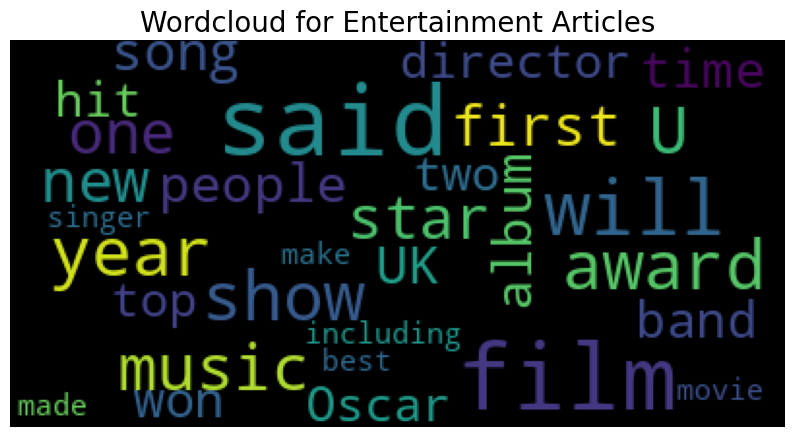

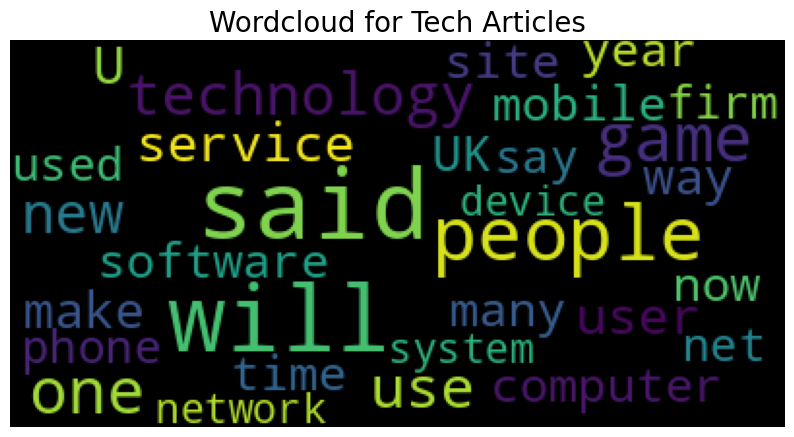

In [ ]:
# Cell 6: Generate WordClouds
for category in categories:
    text = ' '.join(df[df['labels']==category]['text'])
    wordcloud = WordCloud(max_font_size=50, max_words=30).generate(text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(f"Wordcloud for {category.title()} Articles", fontsize=20)
    plt.show()



In [ ]:
# Cell 7: Text Preprocessing
X_train_processed = preprocess_text(X_train)
X_test_processed = preprocess_text(X_test)





MultinomialNB Results:
           model  accuracy  precision    recall        f1
0  MultinomialNB  0.967684    0.96683  0.968216  0.967202


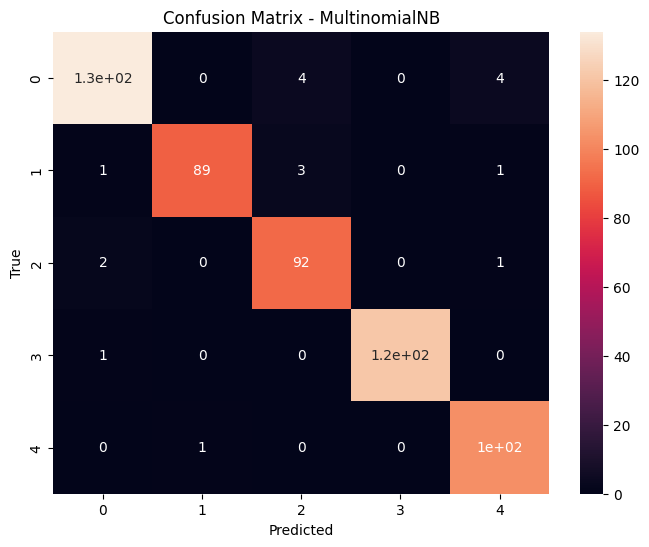

In [ ]:
# Cell 8: Train and Evaluate MultinomialNB with CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_train_cv = vectorizer.fit_transform(X_train_processed)
X_test_cv = vectorizer.transform(X_test_processed)

mnb = MultinomialNB()
mnb.fit(X_train_cv, y_train)
mnb_preds = mnb.predict(X_test_cv)

# Save MultinomialNB model and vectorizer
with open('mnb_model.pkl', 'wb') as f:
    pickle.dump((mnb, vectorizer), f)

mnb_results = get_test_scores('MultinomialNB', mnb_preds, y_test)
print("\nMultinomialNB Results:")
print(mnb_results)

# Plot confusion matrix for MultinomialNB
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, mnb_preds)
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix - MultinomialNB')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()




XGBoost Results:
     model  accuracy  precision    recall        f1
0  XGBoost  0.953321   0.952914  0.954219  0.953181


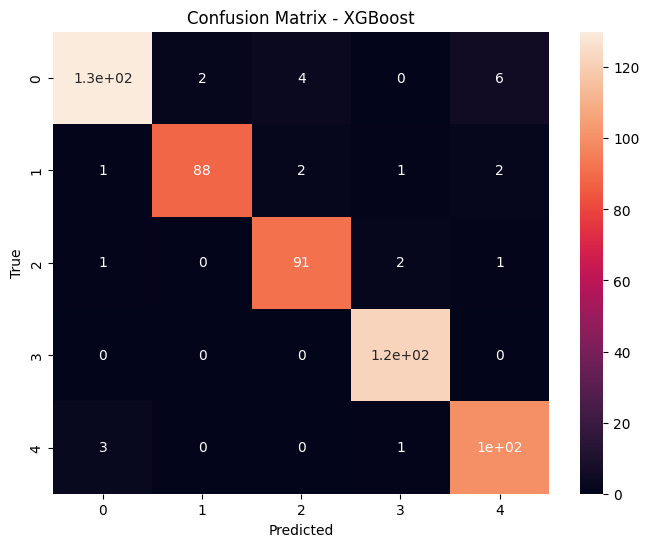

In [ ]:
# Cell 9: Train and Evaluate XGBoost with TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train_processed)
X_test_tfidf = tfidf.transform(X_test_processed)

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

xgb = XGBClassifier(objective='binary:logistic', random_state=42)
xgb.fit(X_train_tfidf, y_train_encoded)
xgb_preds = xgb.predict(X_test_tfidf)

# Save XGBoost model and TF-IDF vectorizer
with open('xgb_model.pkl', 'wb') as f:
    pickle.dump((xgb, tfidf, le), f)

xgb_results = get_test_scores('XGBoost', xgb_preds, y_test_encoded)
print("\nXGBoost Results:")
print(xgb_results)

# Plot confusion matrix for XGBoost
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_encoded, xgb_preds)
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix - XGBoost')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()




Random Forest Results:
           model  accuracy  precision    recall        f1
0  Random Forest  0.960503   0.964062  0.958456  0.960992


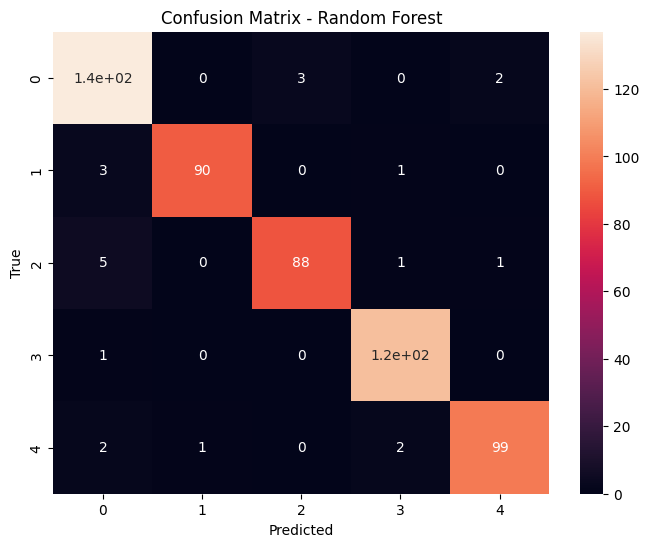

In [ ]:
# Cell 10: Train and Evaluate Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_tfidf, y_train_encoded)
rf_preds = rf.predict(X_test_tfidf)

# Save Random Forest model
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf, f)

rf_results = get_test_scores('Random Forest', rf_preds, y_test_encoded)
print("\nRandom Forest Results:")
print(rf_results)

# Plot confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_encoded, rf_preds)
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()



In [ ]:
# Cell 11: Prepare Data for CNN
df['targets'] = df['labels'].astype("category").cat.codes
df_train, df_test = train_test_split(df, test_size=0.2)
df_train, df_valid = train_test_split(df_train, test_size=0.2)

for data in [df_train, df_valid, df_test]:
    data['text'] = preprocess_text(data['text'])



In [ ]:
# Cell 12: CNN Tokenization and Sequence Preparation
MAX_VOCAB_SIZE = 2000
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train['text'])

sequences_train = tokenizer.texts_to_sequences(df_train['text'])
sequences_valid = tokenizer.texts_to_sequences(df_valid['text'])
sequences_test = tokenizer.texts_to_sequences(df_test['text'])

data_train = tf.keras.preprocessing.sequence.pad_sequences(sequences_train)
T = data_train.shape[1]
data_valid = tf.keras.preprocessing.sequence.pad_sequences(sequences_valid, maxlen=T)
data_test = tf.keras.preprocessing.sequence.pad_sequences(sequences_test, maxlen=T)



In [ ]:
# Cell 13: Build and Train CNN Model
V = len(tokenizer.word_index)
D = 50
K = df['targets'].max() + 1

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(T,)),
    tf.keras.layers.Embedding(V+1, D),
    tf.keras.layers.Conv1D(32, 3, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(K, activation='softmax')
])

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']
)

callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_accuracy',
        patience=4,
        factor=0.5,
        min_lr=0.0000001
    ),
    tf.keras.callbacks.ModelCheckpoint(
        'best_model.keras',
        save_best_only=True,
        monitor='val_accuracy',
        mode='max'
    )
]

history = model.fit(
    data_train, df_train['targets'],
    epochs=10,
    validation_data=(data_valid, df_valid['targets']),
    callbacks=callbacks
)

# Save tokenizer
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)



Epoch 1/10
45/45 [==============================] - 10s 200ms/step - loss: 1.6028 - accuracy: 0.2233 - val_loss: 1.6071 - val_accuracy: 0.1966 - lr: 0.0010
Epoch 2/10
45/45 [==============================] - 8s 168ms/step - loss: 1.5968 - accuracy: 0.2423 - val_loss: 1.5968 - val_accuracy: 0.3118 - lr: 0.0010
Epoch 3/10
45/45 [==============================] - 9s 190ms/step - loss: 1.5744 - accuracy: 0.3279 - val_loss: 1.5662 - val_accuracy: 0.3904 - lr: 0.0010
Epoch 4/10
45/45 [==============================] - 9s 210ms/step - loss: 1.5249 - accuracy: 0.4277 - val_loss: 1.5083 - val_accuracy: 0.5140 - lr: 0.0010
Epoch 5/10
45/45 [==============================] - 7s 163ms/step - loss: 1.4531 - accuracy: 0.4930 - val_loss: 1.4329 - val_accuracy: 0.5309 - lr: 0.0010
Epoch 6/10
45/45 [==============================] - 10s 221ms/step - loss: 1.3648 - accuracy: 0.5639 - val_loss: 1.3377 - val_accuracy: 0.6292 - lr: 0.0010
Epoch 7/10
45/45 [==============================] - 8s 182ms/step - 

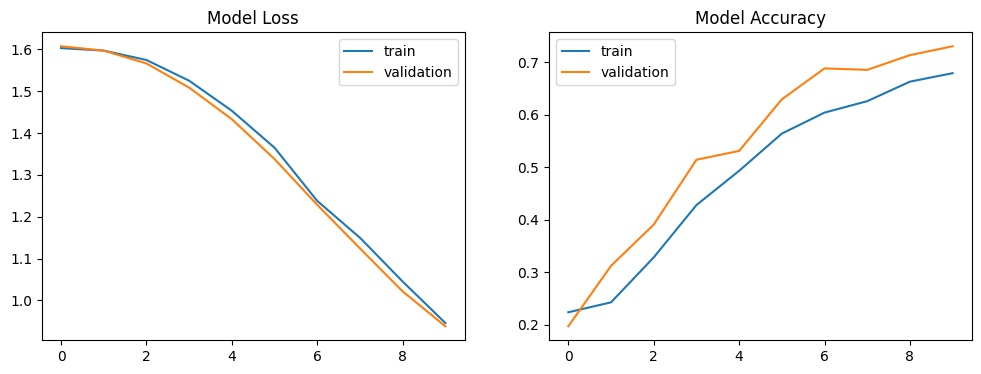

In [ ]:
# Cell 14: Plot CNN Training History
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Model Accuracy')
plt.legend()
plt.show()



In [ ]:
# Cell 15: Evaluate CNN Model
cnn_score = model.evaluate(data_test, df_test['targets'], verbose=0)
print("\nCNN Model Results:")
print(f"Test Loss: {cnn_score[0]:.4f}")
print(f"Test Accuracy: {cnn_score[1]:.4f}")




CNN Model Results:
Test Loss: 0.8720
Test Accuracy: 0.7663


In [ ]:
# Cell 16: Example Usage of Saved Models (Run this after models are trained)

# Example text to classify
#text = "The Sao Paulo Grand Prix brought drama with McLaren’s Lando Norris narrowly avoiding a penalty due to an aborted start. Max Verstappen's dominant performance keeps his title aspirations strong, despite some criticisms of his team’s strategic calls"
#text = input(" ")
# Preprocess text
text_processed = preprocess_text(pd.Series([text]))[0]

# Load and use MultinomialNB model
with open('mnb_model.pkl', 'rb') as f:
    mnb, cv = pickle.load(f)
mnb_pred = mnb.predict(cv.transform([text_processed]))[0]

# Load and use XGBoost model
with open('xgb_model.pkl', 'rb') as f:
    xgb, tfidf, le = pickle.load(f)
xgb_pred = le.inverse_transform([xgb.predict(tfidf.transform([text_processed]))[0]])[0]

# Load and use Random Forest model
with open('rf_model.pkl', 'rb') as f:
    rf = pickle.load(f)
rf_pred = le.inverse_transform([rf.predict(tfidf.transform([text_processed]))[0]])[0]

# Load and use CNN model
cnn_model = tf.keras.models.load_model('best_model.keras')
with open('tokenizer.pkl', 'rb') as f:
    tokenizer = pickle.load(f)

sequence = tokenizer.texts_to_sequences([text_processed])
padded = tf.keras.preprocessing.sequence.pad_sequences(sequence, maxlen=T)
cnn_pred = le.inverse_transform([np.argmax(cnn_model.predict(padded))])[0]

print(f"MultinomialNB prediction: {mnb_pred}")
print(f"XGBoost prediction: {xgb_pred}")
print(f"Random Forest prediction: {rf_pred}")
print(f"CNN prediction: {cnn_pred}")


1/1 [==============================] - 0s 80ms/step
MultinomialNB prediction: tech
XGBoost prediction: tech
Random Forest prediction: tech
CNN prediction: politics


In [ ]:
 !pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 83.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 95.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 10.0 MB/s eta 0:00:00


In [ ]:
!npm install localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏
added 22 packages in 2s
⠏
⠏3 packages are looking for funding
⠏  run `npm fund` for details
⠏

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
%%writefile News.py
from typing import Text

import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import string
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from collections import Counter, defaultdict
import plotly.express as px
import plotly.graph_objects as go
from textblob import TextBlob
import time
import re
from datetime import datetime
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import pos_tag, ne_chunk
from nltk.chunk import tree2conlltags

print('getting')

# Download required NLTK data
try:
    nltk.data.find('punkt')
except LookupError:
    nltk.download('punkt')
try:
    nltk.data.find('stopwords')
except LookupError:
    nltk.download('stopwords')
try:
    nltk.data.find('averaged_perceptron_tagger')
except LookupError:
    nltk.download('averaged_perceptron_tagger')
try:
    nltk.data.find('maxent_ne_chunker')
except LookupError:
    nltk.download('maxent_ne_chunker')
try:
    nltk.data.find('words')
except LookupError:
    nltk.download('words')
try:
    nltk.data.find('vader_lexicon')
except LookupError:
    nltk.download('vader_lexicon')

# Set page config with dark theme
st.set_page_config(
    page_title="Advanced News Classification Pro",
    page_icon="📰",
    layout="wide",
    initial_sidebar_state="expanded"
)

# Enhanced Custom CSS with dark theme
st.markdown("""
    <style>
    .stButton>button {
        width: 100%;
        background-color: #1f77b4;
        color: white;
        border-radius: 10px;
        border: none;
        padding: 10px 15px;
        transition: all 0.3s;
    }
    .stButton>button:hover {
        background-color: #2c89c5;
        transform: translateY(-2px);
        box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);
    }
    .css-1d391kg {
        padding: 2rem;
        border-radius: 15px;
        background-color: #1e1e1e;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
    }
    .stProgress .st-bo {
        background-color: #1f77b4;
    }
    div.block-container {
        padding-top: 2rem;
    }
    .metric-card {
        background-color: #2d2d2d;
        padding: 1.5rem;
        border-radius: 12px;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
        margin: 1rem 0;
    }
    .stat-value {
        font-size: 2rem;
        font-weight: bold;
        color: #1f77b4;
    }
    .stat-label {
        font-size: 1rem;
        color: #888;
    }
    .plotly-chart {
        background-color: #2d2d2d;
        border-radius: 12px;
        padding: 1rem;
    }
    </style>
""", unsafe_allow_html=True)

def get_readability_scores(text):
    """Calculate various readability metrics"""
    words = word_tokenize(text)
    sentences = sent_tokenize(text)

    def count_syllables(word):
        return len(re.findall('[aeiou]+', word.lower())) + 1

    avg_syllables = np.mean([count_syllables(word) for word in words])

    word_count = len(words)
    sentence_count = len(sentences)
    avg_words_per_sentence = word_count / sentence_count if sentence_count > 0 else 0

    flesch = 206.835 - 1.015 * avg_words_per_sentence - 84.6 * avg_syllables

    complex_words = len([word for word in words if count_syllables(word) >= 3])
    fog_index = 0.4 * (avg_words_per_sentence + 100 * (complex_words / word_count))

    return {
        'flesch_reading_ease': max(0, min(100, flesch)),
        'gunning_fog_index': fog_index,
        'avg_syllables_per_word': avg_syllables,
        'complex_words_ratio': complex_words / word_count if word_count > 0 else 0
    }
def create_emotion_chart(text):
    """
    Analyze emotional content in text using NLTK and return emotion scores.

    Args:
        text (str): Input text to analyze

    Returns:
        dict: Dictionary of emotion scores
    """
    # Initialize emotion lexicons
    emotion_lexicon = {
        'joy': ['happy', 'delighted', 'excited', 'glad', 'pleased', 'joyful', 'celebrate', 'cheer'],
        'sadness': ['sad', 'unhappy', 'depressed', 'gloomy', 'miserable', 'disappointed', 'upset'],
        'anger': ['angry', 'furious', 'outraged', 'annoyed', 'irritated', 'frustrated', 'hostile'],
        'fear': ['afraid', 'scared', 'frightened', 'terrified', 'anxious', 'worried', 'nervous'],
        'surprise': ['surprised', 'amazed', 'astonished', 'shocked', 'startled', 'unexpected'],
        'neutral': ['said', 'reported', 'stated', 'mentioned', 'noted', 'explained', 'described']
    }

    # Tokenize and clean text
    words = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words and word.isalnum()]

    # Initialize emotion scores
    emotion_scores = {emotion: 0.0 for emotion in emotion_lexicon.keys()}
    word_count = len(words)

    # Calculate base emotion scores from lexicon matches
    for emotion, keywords in emotion_lexicon.items():
        matches = sum(1 for word in words if word in keywords)
        emotion_scores[emotion] = matches / word_count if word_count > 0 else 0

    # Enhance with VADER sentiment analysis
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(text)

    # Adjust emotion scores based on overall sentiment
    if sentiment_scores['compound'] > 0.2:
        emotion_scores['joy'] += 0.2
        emotion_scores['sadness'] -= 0.1
    elif sentiment_scores['compound'] < -0.2:
        emotion_scores['sadness'] += 0.2
        emotion_scores['joy'] -= 0.1

    # Normalize scores to ensure they're between 0 and 1
    total = sum(emotion_scores.values())
    if total > 0:
        emotion_scores = {k: max(0, min(v/total, 1)) for k, v in emotion_scores.items()}

    return emotion_scores
def analyze_writing_style(text):
    """Analyze writing style characteristics"""
    sentences = sent_tokenize(text)
    words = word_tokenize(text)

    sentence_lengths = [len(word_tokenize(sent)) for sent in sentences]
    sentence_variety = np.std(sentence_lengths) if len(sentence_lengths) > 1 else 0

    unique_words = set(words)
    sophisticated_words = len([w for w in unique_words if len(w) > 8])

    transition_words = set(['however', 'therefore', 'furthermore', 'moreover', 'nevertheless',
                          'meanwhile', 'consequently', 'indeed', 'notably', 'similarly'])
    transition_count = len([w for w in words if w.lower() in transition_words])

    return {
        'sentence_variety': sentence_variety,
        'vocabulary_sophistication': sophisticated_words / len(unique_words) if unique_words else 0,
        'transition_density': transition_count / len(sentences) if sentences else 0,
        'avg_paragraph_length': len(words) / (text.count('\n\n') + 1)
    }

def create_radar_chart(metrics_dict):
    """Create a radar chart for text metrics"""
    categories = list(metrics_dict.keys())
    values = list(metrics_dict.values())

    fig = go.Figure()

    fig.add_trace(go.Scatterpolar(
        r=values,
        theta=categories,
        fill='toself',
        name='Article Metrics'
    ))

    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 1]
            )),
        showlegend=False,
        template='plotly_dark',
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)'
    )

    return fig

def create_word_cloud(text):
    """Generate a word cloud from text"""
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='black',
        colormap='viridis',
        max_words=100
    ).generate(text)

    return wordcloud



def analyze_content(text):
    """
    Perform detailed content analysis
    """
    try:
        # Initialize content dictionary
        content = {
            'topic_scores': {},
            'entities': defaultdict(list),
            'sentiment': {},
            'style': {},
            'emotions': {}
        }

        # Topic keywords - Updated with all categories
        topic_keywords = {
            'sports': {
                'keywords': ['sports', 'game', 'team', 'player', 'match', 'tournament', 'championship',
                             'cricket', 'football', 'basketball', 'score', 'win', 'victory'],
                'weight': 1.0
            },
            'technology': {
                'keywords': ['technology', 'software', 'digital', 'computer', 'internet', 'app',
                             'artificial intelligence', 'innovation', 'data', 'cyber'],
                'weight': 1.0
            },
            'business': {
                'keywords': ['business', 'market', 'economy', 'finance', 'company', 'stock',
                             'investment', 'trade', 'industry', 'startup'],
                'weight': 1.0
            },
            'politics': {
                'keywords': ['politics', 'government', 'election', 'policy', 'law', 'senate', 'parliament',
                             'president', 'minister', 'vote', 'legislation', 'democracy', 'campaign'],
                'weight': 1.0
            },
            'crime': {
                'keywords': ['crime', 'murder', 'theft', 'robbery', 'assault', 'fraud', 'investigation',
                             'police', 'criminal', 'violence', 'court', 'arrest', 'trial', 'victim'],
                'weight': 1.0
            },
            'spiritual': {
                'keywords': ['spiritual', 'faith', 'religion', 'meditation', 'prayer', 'soul', 'enlightenment',
                             'peace', 'harmony', 'ritual', 'divine', 'consciousness', 'spirituality', 'belief'],
                'weight': 1.0
            }
        }

        # Calculate topic scores
        words = word_tokenize(text.lower())
        word_count = len(words)

        for topic, data in topic_keywords.items():
            keywords = data['keywords']
            weight = data['weight']

            # Count keyword occurrences
            topic_score = sum(words.count(keyword.lower()) for keyword in keywords)
            normalized_score = (topic_score * weight) / word_count if word_count > 0 else 0

            content['topic_scores'][topic] = {
                'score': normalized_score,
                'keywords_found': [k for k in keywords if k.lower() in text.lower()]
            }

        # Sentiment analysis
        sia = SentimentIntensityAnalyzer()
        sentiment_scores = sia.polarity_scores(text)
        content['sentiment'] = sentiment_scores

        # Named Entity Recognition
        for sent in sent_tokenize(text):
            tokens = word_tokenize(sent)
            tagged = pos_tag(tokens)
            chunks = ne_chunk(tagged)

            for chunk in chunks:
                if hasattr(chunk, 'label'):
                    entity_text = ' '.join([token for token, pos in chunk.leaves()])
                    content['entities'][chunk.label()].append(entity_text)

        return content

    except Exception as e:
        print(f"Error in content analysis: {str(e)}")
        # Instead of returning None, return a default content structure
        return {
            'topic_scores': {'general': {'score': 0.5, 'keywords_found': []}},
            'entities': defaultdict(list),
            'sentiment': {'compound': 0, 'pos': 0, 'neg': 0, 'neu': 1.0},
            'style': {},
            'emotions': {}
        }

def get_text_stats(text):
    """Get enhanced text statistics"""
    words = word_tokenize(text)
    sentences = sent_tokenize(text)
    stop_words = set(stopwords.words('english'))
    words_no_stop = [word for word in words if word.lower() not in stop_words]

    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity

    reading_time = len(words) / 200

    stats = {
        'word_count': len(words),
        'sentence_count': len(sentences),
        'avg_word_length': np.mean([len(word) for word in words]),
        'avg_sentence_length': len(words) / len(sentences) if sentences else 0,
        'unique_words': len(set(words)),
        'stopwords_ratio': (len(words) - len(words_no_stop)) / len(words) if words else 0,
        'sentiment': sentiment,
        'subjectivity': subjectivity,
        'reading_time': reading_time,
        'vocabulary_richness': len(set(words)) / len(words) if words else 0,
        'long_words_ratio': len([word for word in words if len(word) > 6]) / len(words) if words else 0
    }
    return stats, words_no_stop

def analyze_text(text):
    """
    Main text analysis function
    """
    print(text)
    content_analysis = analyze_content(text)
    predictions = {
        'classification': {
            'category': max(content_analysis['topic_scores'].items(),
                          key=lambda x: x[1]['score'])[0],
            'confidence': max(score['score']
                            for score in content_analysis['topic_scores'].values())
        }
    }

    return predictions, content_analysis
def explain_emotion_analysis(text):
    """
    Provides detailed explanation of emotion analysis results
    """
    emotion_scores = create_emotion_chart(text)

    # Get top emotions
    sorted_emotions = sorted(emotion_scores.items(), key=lambda x: x[1], reverse=True)

    # Analyze emotional triggers
    words = word_tokenize(text.lower())
    emotion_triggers = defaultdict(list)

    for word in words:
        for emotion, keywords in emotion_lexicon.items():
            if word in keywords:
                emotion_triggers[emotion].append(word)

    # Generate explanation
    explanation = {
        'dominant_emotion': sorted_emotions[0][0],
        'emotion_distribution': sorted_emotions,
        'triggers': dict(emotion_triggers),
        'confidence': sorted_emotions[0][1]
    }

    return explanation

def get_detailed_predictions(text):
    """
    Generate comprehensive predictions using multiple models and approaches
    """
    # Topic Classification
    content_analysis = analyze_content(text)
    topic_predictions = {
        'primary_topic': max(content_analysis['topic_scores'].items(),
                           key=lambda x: x[1]['score'])[0],
        'topic_distribution': content_analysis['topic_scores']
    }

    # Sentiment Analysis
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(text)
    sentiment_category = 'positive' if sentiment_scores['compound'] > 0.05 else \
                        'negative' if sentiment_scores['compound'] < -0.05 else 'neutral'

    # News Category Classification
    news_categories = {
        'breaking_news': ['urgent', 'breaking', 'just in', 'latest'],
        'feature_story': ['insight', 'analysis', 'perspective', 'feature'],
        'opinion': ['opinion', 'editorial', 'viewpoint', 'commentary'],
        'investigative': ['investigation', 'expose', 'revealed', 'uncovered']
    }

    # Calculate category scores
    category_scores = {}
    words = word_tokenize(text.lower())
    for category, keywords in news_categories.items():
        score = sum(words.count(keyword) for keyword in keywords)
        category_scores[category] = score / len(words) if words else 0

    # Writing Style Analysis
    writing_style = analyze_writing_style(text)
    formality_score = (writing_style['vocabulary_sophistication'] * 0.4 +
                      writing_style['transition_density'] * 0.3 +
                      (1 - writing_style['sentence_variety']) * 0.3)

    style_category = 'formal' if formality_score > 0.6 else \
                    'casual' if formality_score < 0.4 else 'balanced'

    # Readability Assessment
    readability = get_readability_scores(text)
    complexity_level = 'advanced' if readability['gunning_fog_index'] > 14 else \
                      'intermediate' if readability['gunning_fog_index'] > 10 else 'basic'

    return {
        'topic_classification': {
            'primary_topic': topic_predictions['primary_topic'],
            'confidence': max(score['score'] for score in topic_predictions['topic_distribution'].values()),
            'topic_distribution': {topic: data['score']
                                 for topic, data in topic_predictions['topic_distribution'].items()}
        },
        'sentiment_analysis': {
            'category': sentiment_category,
            'scores': sentiment_scores,
            'confidence': abs(sentiment_scores['compound'])
        },
        'news_type': {
            'category': max(category_scores.items(), key=lambda x: x[1])[0],
            'distribution': category_scores,
            'confidence': max(category_scores.values())
        },
        'writing_style': {
            'category': style_category,
            'formality_score': formality_score,
            'metrics': writing_style
        },
        'readability': {
            'level': complexity_level,
            'metrics': readability
        }
    }

def display_predictions_tab(text):
    """
    Display comprehensive predictions in an organized layout
    """
    predictions = get_detailed_predictions(text)

    # Create columns for different prediction types
    col1, col2 = st.columns(2)

    with col1:
        st.markdown("### 📋 Primary Classifications")

        # Topic Classification
        st.markdown("#### Topic Classification")
        topic_conf = predictions['topic_classification']['confidence']
        st.metric(
            "Primary Topic",
            predictions['topic_classification']['primary_topic'].title(),
            f"Confidence: {topic_conf:.1%}"
        )

        # Topic Distribution Chart
        topic_dist = predictions['topic_classification']['topic_distribution']
        fig_topics = px.bar(
            x=list(topic_dist.keys()),
            y=list(topic_dist.values()),
            title="Topic Distribution",
            template='plotly_dark'
        )
        st.plotly_chart(fig_topics, use_container_width=True)

        # News Type
        st.markdown("#### News Category")
        news_type_conf = predictions['news_type']['confidence']
        st.metric(
            "Article Type",
            predictions['news_type']['category'].replace('_', ' ').title(),
            f"Confidence: {news_type_conf:.1%}"
        )

    with col2:
        st.markdown("### 📊 Content Analysis")

        # Sentiment Analysis
        st.markdown("#### Sentiment Analysis")
        sentiment_conf = predictions['sentiment_analysis']['confidence']
        st.metric(
            "Sentiment",
            predictions['sentiment_analysis']['category'].title(),
            f"Confidence: {sentiment_conf:.1%}"
        )

        # Writing Style
        st.markdown("#### Writing Style")
        st.metric(
            "Style Category",
            predictions['writing_style']['category'].title(),
            f"Formality Score: {predictions['writing_style']['formality_score']:.2f}"
        )

        # Readability Level
        st.markdown("#### Content Complexity")
        st.metric(
            "Readability Level",
            predictions['readability']['level'].title(),
            f"Fog Index: {predictions['readability']['metrics']['gunning_fog_index']:.1f}"
        )
def get_expanded_news_categories():
    """
    Returns expanded dictionary of news categories and their keywords
    """
    return {
        'breaking_news': [
            'urgent', 'breaking', 'just in', 'latest', 'developing', 'update',
            'emergency', 'alert', 'live', 'happening now'
        ],
        'feature_story': [
            'insight', 'analysis', 'perspective', 'feature', 'in-depth', 'special report',
            'examination', 'exploration', 'behind the scenes', 'profile'
        ],
        'opinion': [
            'opinion', 'editorial', 'viewpoint', 'commentary', 'column', 'op-ed',
            'review', 'critique', 'assessment', 'perspective'
        ],
        'investigative': [
            'investigation', 'expose', 'revealed', 'uncovered', 'exclusive', 'probe',
            'findings', 'documents show', 'sources reveal', 'deep dive'
        ],
        'political': [
            'politics', 'government', 'election', 'policy', 'legislation', 'congress',
            'parliament', 'campaign', 'vote', 'democratic', 'republican'
        ],
        'business': [
            'market', 'economy', 'finance', 'stocks', 'investment', 'corporate',
            'industry', 'company', 'trade', 'business'
        ],
        'technology': [
            'technology', 'tech', 'digital', 'innovation', 'startup', 'software',
            'artificial intelligence', 'AI', 'cybersecurity', 'data'
        ],
        'crime': [
            'crime', 'criminal', 'theft', 'murder', 'robbery', 'police', 'arrest',
            'investigation', 'court', 'trial', 'victim', 'suspect', 'evidence'
        ],
        'spiritual': [
            'spiritual', 'faith', 'religion', 'meditation', 'prayer', 'divine',
            'enlightenment', 'soul', 'consciousness', 'belief', 'ritual', 'sacred'
        ]
    }

def analyze_content_detailed(text):
    """
    Perform detailed content analysis with multiple approaches
    """
    analysis = {
        'categories': {},
        'entities': defaultdict(list),
        'themes': [],
        'key_phrases': [],
        'metadata': {},
        'style_markers': {},
        'sentiment_details': {},
        'readability_metrics': {}
    }

    # Text preprocessing
    words = word_tokenize(text.lower())
    sentences = sent_tokenize(text)
    stop_words = set(stopwords.words('english'))
    words_no_stop = [w for w in words if w not in stop_words and w.isalnum()]

    # Category Analysis
    categories = get_expanded_news_categories()
    for category, keywords in categories.items():
        matches = sum(1 for word in words_no_stop if any(k in word for k in keywords))
        confidence = matches / len(words_no_stop) if words_no_stop else 0
        supporting_evidence = [word for word in words_no_stop if any(k in word for k in keywords)]

        analysis['categories'][category] = {
            'score': confidence,
            'evidence': supporting_evidence,
            'keyword_matches': matches
        }

    # Named Entity Recognition
    for sent in sentences:
        tokens = word_tokenize(sent)
        tagged = pos_tag(tokens)
        chunks = ne_chunk(tagged)

        for chunk in chunks:
            if hasattr(chunk, 'label'):
                entity_text = ' '.join([token for token, pos in chunk.leaves()])
                analysis['entities'][chunk.label()].append({
                    'text': entity_text,
                    'context': sent
                })

    # Theme Analysis
    blob = TextBlob(text)
    noun_phrases = blob.noun_phrases
    word_freq = Counter(words_no_stop)

    # Extract significant themes
    significant_phrases = [phrase for phrase in noun_phrases
                         if len(word_tokenize(phrase)) > 1]
    analysis['themes'] = [
        {
            'phrase': phrase,
            'frequency': sum(word_freq[word] for word in word_tokenize(phrase)),
            'sentiment': TextBlob(phrase).sentiment.polarity
        }
        for phrase in significant_phrases[:10]  # Top 10 themes
    ]

    # Key Phrase Extraction
    sentences_scores = {}
    for sentence in sentences:
        words_in_sent = word_tokenize(sentence.lower())
        score = sum(word_freq[word] for word in words_in_sent if word in word_freq)
        sentences_scores[sentence] = score / len(words_in_sent) if words_in_sent else 0

    analysis['key_phrases'] = sorted(
        sentences_scores.items(),
        key=lambda x: x[1],
        reverse=True
    )[:5]  # Top 5 key phrases

    # Style Analysis
    style_metrics = analyze_writing_style(text)
    readability_scores = get_readability_scores(text)

    analysis['style_markers'] = {
        'formality': calculate_formality_score(text, style_metrics),
        'complexity': calculate_complexity_score(readability_scores),
        'engagement': calculate_engagement_score(text, style_metrics),
        'technical_level': calculate_technical_level(text, word_freq)
    }

    # Detailed Sentiment Analysis
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(text)

    analysis['sentiment_details'] = {
        'overall': sentiment_scores,
        'by_paragraph': [
            {
                'text': para,
                'sentiment': sia.polarity_scores(para)
            }
            for para in text.split('\n\n') if para.strip()
        ],
        'emotional_tone': analyze_emotional_tone(text)
    }

    return analysis

def display_comprehensive_analysis(text):
    """
    Display comprehensive analysis results in an organized dashboard
    """
    analysis = analyze_content_detailed(text)

    # Layout
    st.markdown("## 📊 Comprehensive Content Analysis")

    # Create tabs for detailed analysis
    analysis_tabs = st.tabs([
        "Category & Topic",
        "Content Insights",
        "Style & Tone",
        "Entities & Themes"
    ])

    # Category & Topic Tab
    with analysis_tabs[0]:
        col1, col2 = st.columns([2, 1])

        with col1:
            st.markdown("### 📑 Category Analysis")

            # Create category confidence chart
            categories = analysis['categories']
            category_df = pd.DataFrame({
                'Category': categories.keys(),
                'Confidence': [cat['score'] for cat in categories.values()]
            }).sort_values('Confidence', ascending=False)

            fig = px.bar(
                category_df,
                x='Category',
                y='Confidence',
                title='Category Confidence Scores',
                template='plotly_dark'
            )
            st.plotly_chart(fig, use_container_width=True)

            # Show top category details
            top_category = category_df.iloc[0]
            st.metric(
                "Primary Category",
                top_category['Category'],
                f"Confidence: {top_category['Confidence']:.1%}"
            )

        with col2:
            st.markdown("### 🔍 Supporting Evidence")
            top_cat_evidence = categories[top_category['Category']]['evidence']
            st.write("Key terms found:")
            for term in top_cat_evidence[:10]:
                st.markdown(f"- {term}")

    # Content Insights Tab
    with analysis_tabs[1]:
        col1, col2 = st.columns(2)

        with col1:
            st.markdown("### 📈 Key Metrics")
            style_markers = analysis['style_markers']

            metrics = {
                "Formality": style_markers['formality'],
                "Complexity": style_markers['complexity'],
                "Engagement": style_markers['engagement'],
                "Technical Level": style_markers['technical_level']
            }

            for name, value in metrics.items():
                st.metric(name, f"{value:.2f}")

        with col2:
            st.markdown("### 💭 Key Themes")
            themes_df = pd.DataFrame(analysis['themes'])
            if not themes_df.empty:
                fig = px.scatter(
                    themes_df,
                    x='frequency',
                    y='sentiment',
                    text='phrase',
                    title='Theme Analysis',
                    template='plotly_dark'
                )
                st.plotly_chart(fig, use_container_width=True)

    # Style & Tone Tab
    with analysis_tabs[2]:
        col1, col2 = st.columns(2)

        with col1:
            st.markdown("### 🎭 Sentiment Flow")
            sentiment_by_para = analysis['sentiment_details']['by_paragraph']
            sentiment_df = pd.DataFrame([
                {
                    'Paragraph': i+1,
                    'Sentiment': para['sentiment']['compound']
                }
                for i, para in enumerate(sentiment_by_para)
            ])

            fig = px.line(
                sentiment_df,
                x='Paragraph',
                y='Sentiment',
                title='Sentiment Flow Throughout Article',
                template='plotly_dark'
            )
            st.plotly_chart(fig, use_container_width=True)

        with col2:
            st.markdown("### 📝 Writing Style")
            emotional_tone = analysis['sentiment_details']['emotional_tone']

            fig = px.pie(
                values=list(emotional_tone.values()),
                names=list(emotional_tone.keys()),
                title='Emotional Tone Distribution',
                template='plotly_dark'
            )
            st.plotly_chart(fig, use_container_width=True)

    # Entities & Themes Tab
    with analysis_tabs[3]:
        st.markdown("### 🔍 Named Entities")

        entities = analysis['entities']
        if entities:
            for entity_type, entries in entities.items():
                with st.expander(f"{entity_type} ({len(entries)})"):
                    for entry in entries:
                        st.markdown(f"- **{entry['text']}**")
                        st.markdown(f"  *Context:* {entry['context']}")
        else:
            st.info("No named entities detected in the text.")

def calculate_formality_score(text, style_metrics):
    """Calculate formality score based on various metrics"""
    words = word_tokenize(text.lower())
    formal_indicators = len([w for w in words if len(w) > 6])
    return (formal_indicators / len(words) if words else 0) * style_metrics['vocabulary_sophistication']

def calculate_complexity_score(readability_scores):
    """Calculate complexity score based on readability metrics"""
    return min(1.0, readability_scores['gunning_fog_index'] / 20.0)

def calculate_engagement_score(text, style_metrics):
    """Calculate engagement score based on writing style"""
    sentences = sent_tokenize(text)
    question_ratio = len([s for s in sentences if s.endswith('?')]) / len(sentences) if sentences else 0
    return (style_metrics['transition_density'] + question_ratio) / 2

def calculate_technical_level(text, word_freq):
    """Calculate technical level based on vocabulary usage"""
    technical_indicators = ['analysis', 'research', 'study', 'data', 'method', 'results']
    technical_words = sum(word_freq[word] for word in technical_indicators if word in word_freq)
    return technical_words / sum(word_freq.values()) if word_freq else 0

def analyze_emotional_tone(text):
    """Analyze emotional tone of the text"""
    sia = SentimentIntensityAnalyzer()
    sentences = sent_tokenize(text)

    tones = {
        'objective': 0,
        'emotional': 0,
        'positive': 0,
        'negative': 0,
        'neutral': 0
    }

    for sentence in sentences:
        scores = sia.polarity_scores(sentence)
        if abs(scores['compound']) < 0.1:
            tones['objective'] += 1
        else:
            tones['emotional'] += 1

        if scores['compound'] > 0.1:
            tones['positive'] += 1
        elif scores['compound'] < -0.1:
            tones['negative'] += 1
        else:
            tones['neutral'] += 1

    # Normalize scores
    total = len(sentences)
    return {tone: count/total for tone, count in tones.items()}
def main():
    st.title("📰 Advanced News Classification Pr")
    st.markdown("""
        ### An AI-powered tool for comprehensive news article analysis
        Upload your article to get detailed insights including classification, readability metrics,
        sentiment analysis, and advanced visualizations.
    """)

    # Input section
    st.header("Article Input")
    print('getting')
    text_input = st.text_area(
        "Enter news article text (up to 1000 words)",
        height=300,
        max_chars=5000,
        help="Paste your news article text here for comprehensive analysis"
    )
    print(text_input)

    if st.button("🔍 Analyze Article", key="analyze_button"):
        if not text_input:
            st.warning("Please enter some text to analyze.")
            return

        with st.spinner("🔄 Performing comprehensive analysis..."):
            # First, get the content analysis
            predictions, content_analysis = analyze_text(text_input)

            # Create tabs for different analysis sections
            tabs = st.tabs([
                "📊 Classification & Predictions",
                "📈 Content Analysis",
                "📝 Readability",
                "🎭 Style & Emotion",
                "🔤 Text Statistics"
            ])

            # Classification & Predictions Tab
            with tabs[0]:
                st.markdown("## 🎯 Comprehensive Article Analysis")
                display_predictions_tab(text_input)

            # Content Analysis Tab
            with tabs[1]:
                col1, col2 = st.columns(2)

                with col1:
                    st.markdown("### 📊 Topic Distribution")
                    topic_scores = {topic: data['score']
                                 for topic, data in content_analysis['topic_scores'].items()}
                    fig_topics = px.pie(
                        values=list(topic_scores.values()),
                        names=list(topic_scores.keys()),
                        title="Topic Distribution",
                        template='plotly_dark'
                    )
                    st.plotly_chart(fig_topics, use_container_width=True)

                with col2:
                    st.markdown("### 🌟 Named Entities")
                    for entity_type, entities in content_analysis['entities'].items():
                        if entities:
                            st.markdown(f"**{entity_type}**: {', '.join(set(entities))}")

            # Readability Tab
            with tabs[2]:
                readability_scores = get_readability_scores(text_input)
                col1, col2 = st.columns(2)

                with col1:
                    st.markdown("### 📚 Readability Metrics")
                    metrics_df = pd.DataFrame({
                        'Metric': readability_scores.keys(),
                        'Score': readability_scores.values()
                    })
                    fig_readability = px.bar(
                        metrics_df,
                        x='Metric',
                        y='Score',
                        title="Readability Scores",
                        template='plotly_dark'
                    )
                    st.plotly_chart(fig_readability, use_container_width=True)

                with col2:
                    st.markdown("### 📊 Readability Radar")
                    normalized_scores = {k: v/100 if k == 'flesch_reading_ease' else v/20
                                      for k, v in readability_scores.items()}
                    fig_radar = create_radar_chart(normalized_scores)
                    st.plotly_chart(fig_radar, use_container_width=True)

            # Style & Emotion Tab
            with tabs[3]:
                col1, col2 = st.columns(2)

                with col1:
                    st.markdown("### 🎨 Writing Style")
                    style_metrics = analyze_writing_style(text_input)
                    fig_style = px.line_polar(
                        r=list(style_metrics.values()),
                        theta=list(style_metrics.keys()),
                        line_close=True,
                        template='plotly_dark'
                    )
                    st.plotly_chart(fig_style, use_container_width=True)

                with col2:
                    st.markdown("### 😊 Emotional Content")
                    emotion_scores = create_emotion_chart(text_input)
                    fig_emotions = px.bar(
                        x=list(emotion_scores.keys()),
                        y=list(emotion_scores.values()),
                        title="Emotional Content Analysis",
                        template='plotly_dark'
                    )
                    st.plotly_chart(fig_emotions, use_container_width=True)

            # Text Statistics Tab
            with tabs[4]:
                col1, col2 = st.columns(2)

                with col1:
                    st.markdown("### 📊 Basic Statistics")
                    stats, _ = get_text_stats(text_input)
                    stats_df = pd.DataFrame(
                        [(k, f"{v:.2f}" if isinstance(v, float) else v)
                         for k, v in stats.items()],
                        columns=['Metric', 'Value']
                    )
                    st.dataframe(stats_df, use_container_width=True)

                with col2:
                    st.markdown("### 🔤 Word Cloud")
                    wordcloud = create_word_cloud(text_input)
                    plt.figure(figsize=(10, 5))
                    plt.imshow(wordcloud, interpolation='bilinear')
                    plt.axis('off')
                    st.pyplot(plt)

if __name__ == "__main__":
    main()

Writing News.py


In [ ]:
!curl ipv4.icanhazip.com

35.204.96.104


In [ ]:
!streamlit run News.py &>./logs.txt & npx localtunnel --port 8501 -y

⠙⠹your url is: https://polite-paws-own.loca.lt
